## Exploratory Data Analysis  
### NZ Energy Demand Forecasting  

I, like many New Zealander's, are proud of our "clean green" image. We all enjoy the outdoors, low levels of pollution, the rolling green hills of the North Island, the sweeping Canterbury plains and the majesty of the Southern Alps. Our sustainable energy supplies are part of the clean green equation. But even natural, sustainable power generation has limits. There's only so much hydro, gas and wind power available and we all need to be concious of the demands on these supplies.

So I thought it would be quite interesting to look at New Zealand's energy consumption.   

  - Where and when do we use the most power?   
  - What can we attribute this too?   
  - Is there anything that I can do to help reduce my own power consumption in a meaningful way? 

Recent trends suggest that information is the key to empowerment, particularly in the retail sector. We're seeing the emergence of apps to help us track our spending, our movement, our water consumption and our power usage. Smart meters are now standard and we are seeing a rise in appliance power monitoring apps and subscription-based retail vendors. All of this helps to understand our own, individual trends. But it can useful too, to understand how we fit into the bigger picture - to have some context around the Nation's trends and how we all contribute to that. 

So let's dive into the Nation's power consumption trends...

### The Data  

Stats NZ have a [COVID-19 Data Portal](https://www.stats.govt.nz/experimental/covid-19-data-portal) with some really interesting datasets tracking the impact that COVID-19 has had on NZ's activity and economy. We're interested in the Daily Electricity Grid Demand dataset:


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

demand = pd.read_csv("../data/nz-energy-data.csv")
demand.columns = ['ID', 'class', 'category', 'indicator_name', 'series_name', 'date', 'demand', 'units']
demand.date = pd.to_datetime(demand.date)

demand.head()

,ID,class,category,indicator_name,series_name,date,demand,units
0,1,Economic,Activity,Electricity grid demand,New Zealand,2015-02-01,98.616,Gigawatt hours
1,2,Economic,Activity,Electricity grid demand,New Zealand,2015-02-02,108.109,Gigawatt hours
2,3,Economic,Activity,Electricity grid demand,New Zealand,2015-02-03,108.902,Gigawatt hours
3,4,Economic,Activity,Electricity grid demand,New Zealand,2015-02-04,107.218,Gigawatt hours
4,5,Economic,Activity,Electricity grid demand,New Zealand,2015-02-05,105.561,Gigawatt hours


### High-level Trends & Historical Breakdowns

Let's begin by looking at the demand across various regions of NZ:

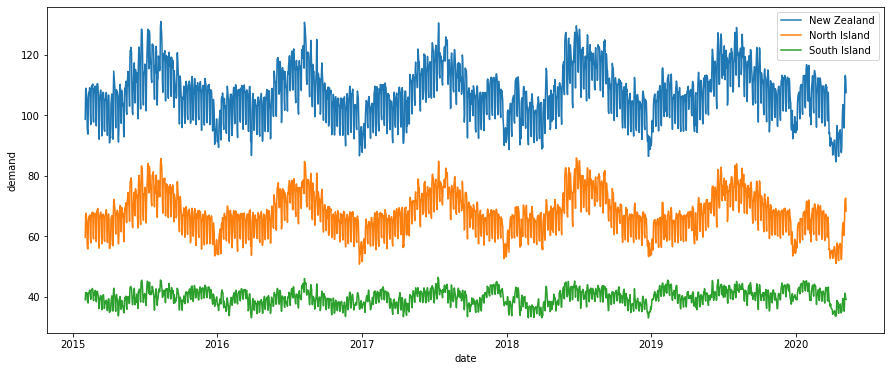

In [23]:
plt.figure(figsize=(15, 6))
for i, region in enumerate(['New Zealand', 'North Island', 'South Island']):
  
  sns.lineplot(x = 'date', y = 'demand', label=region, data = demand[demand.series_name == region])
  
plt.show()

We've got quite a bit of data here, going back to 2015.   

You can immediately see the strong seasonal trend in electricity demand:  

  - electricity demand peaks in winter and is at it's lowest in Summer  
  - there is a notable dip during the Christmas-New Year period every year  
  - the North Island account for nearly 2/3 of the electricity demand of New Zealand  
  
If we look a little closer at the seasonal trends, we can see that there is quite a bit going on here:  

  - the North Island seems to be driving the strong Summer/Winter contrast. It looks like it *might be there* in the South Island, but it isn't obvious to the eye  
  - The Christmas-New Year dip is pronounced in the North Island, much less so in the Sout Island. In fact, it's not abvious at all in the South Island during 2015 and 2016 without squinting quite hard  
  - it has to be more than simply temperature related!  
  
We can safely say that the North Island Winter spikes are due to heating - that this strong trend is related to the weather. But that doesn't exxplain the lack of winter spikes in the South Island, where the remperatures are even stronger. So there has to be more to this story - there's something interesting to try to uncover here.

<br></br>
Let's look a little closer at each region:

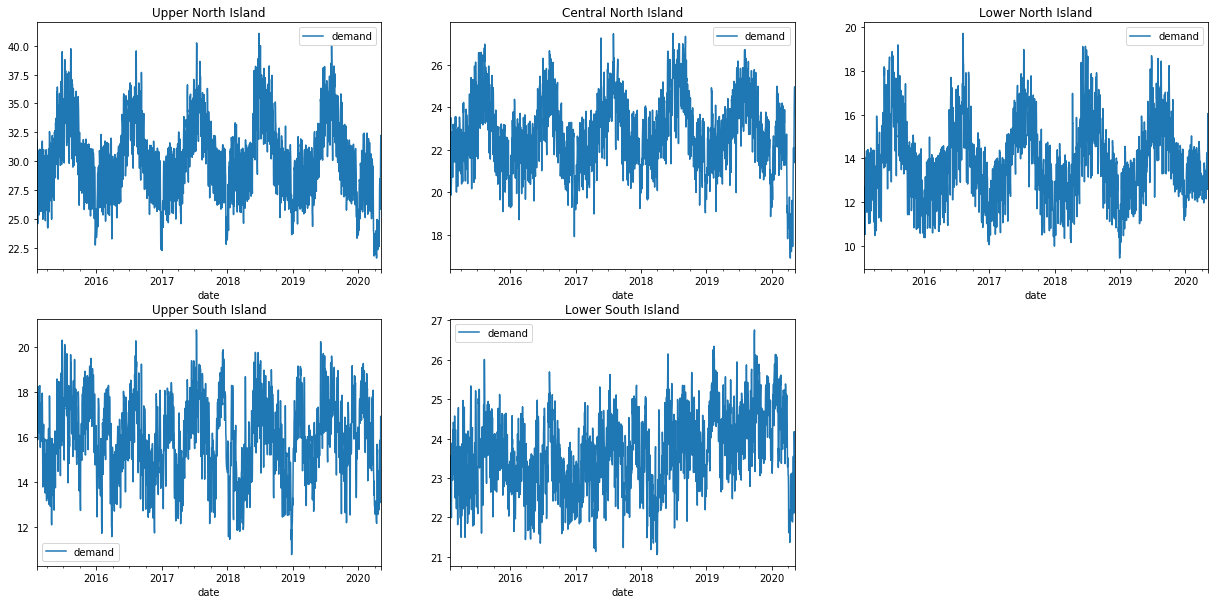

In [26]:
plt.figure(figsize=(21,10))
for i, region in enumerate(['Upper North Island', 'Central North Island', 'Lower North Island', 'Upper South Island', 'Lower South Island']):
  
  demand[demand['series_name'] == region].plot(x = 'date', y = 'demand', title=region, ax = plt.subplot(2,3,i+1))
  
plt.show()

As we zoom in closer, the Summer/Winter contrast becomes clear and is consistent across all regions except the Lower South Island. But there are some other interesting facts which emerge:  

  - The Upper North Island has the highest energy demand, which makes sense due to the population density   
  - The Upper South Island demonstrates the Winter/Summer demand profile, though it isn't as strong or obvious as it is in the Noth Island regions  
  - The North Island regions are quite similar to each other, whereas the South Island regions are definitely different.  
  
There are some interesting regional differences, in particular:  

  - The Upper North Island shows a much stronger "holiday effect" around the Christmas-New Year compared to the other regions.   
    - I am going to go out on a limb with this and suggest that this might be a reflection of commercial energy demand, driven by office space in Auckland.  
      
    
  - The Lower South Island is the only region to demonstrate a growing demand. There is a clear growth in demand from 2018 to 2020.  
  
  - The Upper South Island is a real anomaly:  
    - The energy demand far exceeds the relative population of the region.  
    - There are Winter spikes in demand, but the Summer lows are short-lived, and seem to only last during December. By January, the energy demands are starting to pick up again  
    - We could possibly explain this as:  
      - Summer is quite hot in the Upper South Island, leading to conditions very similar to the Central and Upper North Island  
      - Jan and February are peak tourism months for the Upper South Island, with both domestic and international tourism flocking to Nelson, Tasman and through Marlborough (e.g. Picton). This will drive energy demands.  
      - The Upper South Island is home to 77% of New Zealand's wine industry, is the home of fishing giants Sealords and Talleys, as well as other seasonal summer fruits (for example, berries and stone fruit like apricots). 


#### The Effect of COVID-19  

It's worth noting the heavy impact that COVID-19 has had on energy demand:


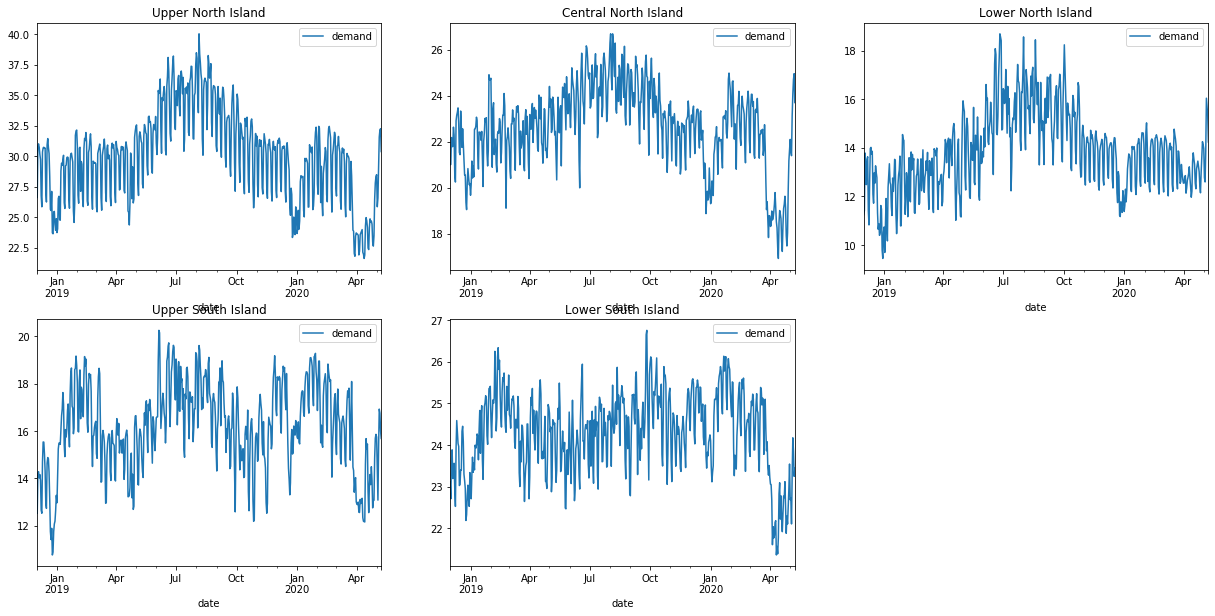

In [37]:
plt.figure(figsize=(21,10))
for i, region in enumerate(['Upper North Island', 'Central North Island', 'Lower North Island', 'Upper South Island', 'Lower South Island']):
  
  demand.query(f"series_name == '{region}' and date >= '2018-12-01'").plot(x = 'date', y = 'demand', title=region, ax = plt.subplot(2,3,i+1))
  
plt.show()

If we zoom in and look more closely, we can see the tremendous impact of COVID-19 on energy demands.   

  - We can see the impact on all regions, *except for the Lower North Island*. What makes this region so excpetional?   
    - Could it simply be the government sector driving this, which would not have shutdown at all over the lockdown?    
    - Is it a measure of the amount of white-collar work in the region, which was able to shift to working from home with little difference in power consumption (barring aircon, heating and cooling in office buildings)?  
    
    
  - The effect is strongest in the Upper North Island, Central North Island and unexpectedly strong in the Lower South Island.  
  - The effect is closer to the "holiday effect" of Christmas-New Year in the Upper South Island and the Upper North Island compare to other regions.  
  

<br></br>
### Developing a Forecasting Plan  

Forecasting these energy demands will be tougher than I first thought. Initially, the demand seems to be strongly seasonal, but quite regular. But on closer inspection we can see the impact of holidays and specific regional behaviours which we will need to carefully capture.  

There are, broadly, three approaches to forecasting:  

  1. entirely data-driven forecasting, where we take the historical data and extrapolate forwards. Inside here, there are probably two major approaches: the first and simplest is to calculate sensible averages over the historical data (e.g. monthly averages over the past 6 years) and simply use these as rough guides. The second is a "pure-approach" to machine learning and AI, where the historical data is passed through a complex algorithm with a view to generate the most accurate fit to the data, but one lacking in insight.   
  
  2. theory-driven, or domain-driven forecasting, where domain experts apply their expertise to develop a theory of "market dynamics" and use this to estimate future demand. This has the advantage of being incredibly flexible and interpretable. Good economists are superb at this approach, where they test market theories with the data they have. The downside of htis approach, is it lends itself to cherrypicking data to suit your beliefs, rather than modifying longheld beliefs in face of evidence from the data.  
  
  3. Finally, statistical learning sits somewhere between, balancing predictive accuracy with dmain knowledge and insights.   
  
At Flock, we are strong advocates of the third approach. A good "model" of the data should both fit well (in the machine learning sense of (1)) and it should provide accurate and quantifiable insights (in the same sense of (2)). Equally, it should allow you to test theories and determine how strongly they are supported in your data. And it extends on the other approaches by allowing you to *accurately quantify* future demand and use the insights to drive your decisions. For example:  

  - What would a typical day in May look like?  
  - What is the highest demand which we will likely have to supply during the Winter months?  
  - With more granualar data, you could also extend the scope of your questioning to include questions like:   
    - who are our biggest consumers?  
    - what is a "typical demand" for Customer X, and should we adjust our pricing if their demand starts to trend upwards (thus, increasing the chance of exceeding capacity)?   
    - Will we have enough capacity to meet peak demands? Will we need to introduce load-balancing across customers during peak months and if so, who should we target to have the lowest impact on consumers but highest impact on peak demand?  
    

With this in mind then, our forecasting plan will be as follows:  

  - establish a simple "baseline model", which captures the seasonal trends for each region  
  - extend the baseline model to include "holiday effects"  
  - interrogate the model to identify areas where it fails to capture the historical demand, and then iterate & improve:  
    - What is driving inaccuracies in the model?   
    - Is there a region-specific, or industry-specific pattern here which we should incorporate?   
    - Is there additional data (for example historical weather data) which would help explain historical electricity demand?  
    
    

If we have time, we might even compare the performance of our models with other popular approaches, such as deep learning.    